In [52]:
from scipy import stats

In [53]:
import pandas as pd

In [54]:
import re

In [55]:
def find_strength(string):
    value = string.find('/6')
    if string[value-1] is '(':
        return (None)
    else:
        return string[value-1]

In [56]:
def cigar_details(string):
    size = string.split('\n')
    return size[2].strip()

In [57]:
#consider striping '-' before date and turing string into date-time object
def cigar_og_issue_date(string):
    size = string.split('\n')
    return size[3].strip()

In [58]:
data = pd.read_csv('cigar_aficionado.csv', index_col='Unnamed: 0')

In [59]:
data.shape

(20769, 19)

In [60]:
df = data.copy()

In [61]:
df.columns

Index(['image', 'name', 'score', 'length', 'gauge', 'strenth_string',
       'tasting_notes', 'size', 'filler', 'binder', 'wrapper', 'country',
       'price', 'issue', 'more_reviews', 'href', 'strength', 'og_issue',
       'og_issue_date'],
      dtype='object')

In [62]:
df.head()

,image,name,score,length,gauge,strenth_string,tasting_notes,size,filler,binder,wrapper,country,price,issue,more_reviews,href,strength,og_issue,og_issue_date
0,https://img.mshanken.com/d/cao/ratings_extras/...,BOLIVAR ROYAL CORONA,93,"4 7/8""",50,background:url('https://img.mshanken.com/d/cao...,"This is an earthy, rich cigar with a lovely br...",Robusto,Cuba,Cuba,Cuba,Cuba,£10.00,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",href,NaN,Cigar Aficionado,"– Sep 01, 1992"
2,https://img.mshanken.com/d/cao/ratings_extras/...,DAVIDOFF GRAN CRU NO. 2,89,"5 5/8""",43,background:url('https://img.mshanken.com/d/cao...,An enticing cigar that keeps you coming back f...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,NaN,\nIssue:\n ...,"[['86', ['Cigar Aficionado: ', ' ...",1001,NaN,Cigar Aficionado,"– Mar 01, 1993"
3,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON CORONA,86,"5 1/2""",44,background:url('https://img.mshanken.com/d/cao...,This cigar is well-made and gives plenty of fl...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.25,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",1002,NaN,Cigar Aficionado,"– Mar 01, 1993"
4,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON MAGNUM,82,"5""",50,background:url('https://img.mshanken.com/d/cao...,"This is a clean, very mild well-made cigar, wi...",Robusto,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.75,\nIssue:\n ...,"[['87', ['Cigar Aficionado: ', ' ...",1003,NaN,Cigar Aficionado,"– Sep 01, 1992"
5,https://img.mshanken.com/d/cao/ratings_extras/...,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"4 1/2""",50,background:url('https://img.mshanken.com/d/cao...,"Finely constructed, A. Fuente's robusto has a ...",Robusto,Dom. Rep.,Dom. Rep.,Ecuador,Dominican Republic,NaN,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",1004,NaN,Cigar Aficionado,"– Sep 01, 1992"


In [63]:
df.image.iloc[0]

'https://img.mshanken.com/d/cao/ratings_extras/silo-corona-gorda.png'

In [64]:
test_length = df.length.iloc[0]

In [65]:
# >>> from fractions import Fraction
# >>> def Arch2Float(num):
#     #First Partition from Right so that the Feet and Unit always
#     #Remains aligned even if one of them is absent
#     ft,x,inch=num.rpartition("\'")
#     #Convert the inch to a real and frac part after stripping the
#     #inch (") identifier. Note it is assumed that the real and frac
#     #parts are delimited by '-'
#     real,x,frac=inch.strip("\"").rpartition("-")
#     #Now Convert every thing in terms of feet which can then be converted
#     #to float. Note to trap Error's like missing or invalid items, its better
#     #to convert each items seperately
#     result=0
#     try:
#         result = int(ft.strip("\'"))
#     except ValueError:
#         None
#     #Convert the real inch part as a fraction of feet
#     try:
#         result +=  Fraction(int(real),12)
#     except ValueError:
#         None
#     #Now finally convert the Fractional part using the fractions module and convert to feet
#     try:
#         result+=Fraction(frac)/12
#     except ValueError:
#         None
#     return float(result)    

In [66]:
scores_df = df.groupby("country").filter(lambda x: len(x) > 10)

In [67]:
scores_df.country.value_counts()

Dominican Republic    8385
Nicaragua             4922
Honduras              3469
Cuba                  2763
U.S.A.                 366
Mexico                 201
Jamaica                175
Costa Rica             117
Bahamas                111
Canary Islands          88
Brazil                  42
Philippines             41
Indonesia               19
Name: country, dtype: int64

<AxesSubplot:>

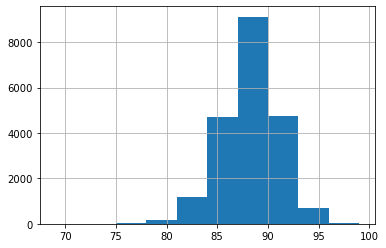

In [68]:
scores_df.score.hist()

In [91]:
dr_score = scores_df[scores_df.country == 'Dominican Republic'].score
print(dr_score.mean())
len(dr_score)

87.0814549791294


8385

In [92]:
cuba_score = scores_df[scores_df.country == 'Cuba'].score
print(cuba_score.mean())
len(cuba_score)

89.54035468693449


2763

In [93]:
nic_score = scores_df[scores_df.country == 'Nicaragua'].score
print(nic_score.mean())
len(nic_score)

88.63896789922795


4922

In [101]:
hon_score = scores_df[scores_df.country == 'Honduras'].score
print(hon_score.mean())
len(hon_score)

87.23753243009513


3469

In [102]:
usa_score = scores_df[scores_df.country == 'U.S.A.'].score
print(usa_score.mean())
len(usa_score)

88.18579234972678


366

In [107]:
jam_score = scores_df[scores_df.country == 'Jamaica'].score
print(jam_score.mean())
len(jam_score)

85.66857142857143


175

In [108]:
mex_score = scores_df[scores_df.country == 'Mexico'].score
print(mex_score.mean())
len(mex_score)

84.66666666666667


201

In [111]:
stats.bartlett(dr_score, cuba_score, nic_score, hon_score, usa_score, mex_score, jam_score)

BartlettResult(statistic=238.42537345345127, pvalue=1.2175551584769307e-48)

In [ ]:
dr_scores.mean()

In [76]:
cuba_scores.mean()

89.54035468693449

In [105]:
stats.ttest_ind(nic_score,usa_score, equal_var = False)

Ttest_indResult(statistic=3.296090553359113, pvalue=0.0010639238963812366)

In [ ]:
#Null: all countries scores are the same

In [98]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=-0.2561846444534243, pvalue=0.797861060982467)

In [112]:
stats.bartlett(rvs1, rvs2)

BartlettResult(statistic=0.16205052507247125, pvalue=0.6872756224097636)

In [16]:
df

,image,name,score,length,gauge,strenth_string,tasting_notes,size,filler,binder,wrapper,country,price,issue,more_reviews,href,strength,og_issue,og_issue_date
0,https://img.mshanken.com/d/cao/ratings_extras/...,BOLIVAR ROYAL CORONA,93,"4 7/8""",50,background:url('https://img.mshanken.com/d/cao...,"This is an earthy, rich cigar with a lovely br...",Robusto,Cuba,Cuba,Cuba,Cuba,£10.00,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",href,NaN,Cigar Aficionado,"– Sep 01, 1992"
2,https://img.mshanken.com/d/cao/ratings_extras/...,DAVIDOFF GRAN CRU NO. 2,89,"5 5/8""",43,background:url('https://img.mshanken.com/d/cao...,An enticing cigar that keeps you coming back f...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,NaN,\nIssue:\n ...,"[['86', ['Cigar Aficionado: ', ' ...",1001,NaN,Cigar Aficionado,"– Mar 01, 1993"
3,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON CORONA,86,"5 1/2""",44,background:url('https://img.mshanken.com/d/cao...,This cigar is well-made and gives plenty of fl...,Corona,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.25,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",1002,NaN,Cigar Aficionado,"– Mar 01, 1993"
4,https://img.mshanken.com/d/cao/ratings_extras/...,ASHTON MAGNUM,82,"5""",50,background:url('https://img.mshanken.com/d/cao...,"This is a clean, very mild well-made cigar, wi...",Robusto,Dom. Rep.,Dom. Rep.,U.S.A./Conn. Shade,Dominican Republic,$6.75,\nIssue:\n ...,"[['87', ['Cigar Aficionado: ', ' ...",1003,NaN,Cigar Aficionado,"– Sep 01, 1992"
5,https://img.mshanken.com/d/cao/ratings_extras/...,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"4 1/2""",50,background:url('https://img.mshanken.com/d/cao...,"Finely constructed, A. Fuente's robusto has a ...",Robusto,Dom. Rep.,Dom. Rep.,Ecuador,Dominican Republic,NaN,\nIssue:\n ...,"[['89', ['Cigar Aficionado: ', ' ...",1004,NaN,Cigar Aficionado,"– Sep 01, 1992"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20769,https://img.mshanken.com/d/cao/ratings_extras/...,E.P. Carrillo Encore TAA 656,89,"5""",56,background:url('https://img.mshanken.com/d/cao...,"Chocolate-brown with a multi-seamed cap, this ...",Toro,Nicaragua,Nicaragua,Nicaragua,Dominican Republic,$13.25,\nIssue:\n ...,"[['89', ['Cigar Insider: ', ' ...",22539,5.0,Cigar Insider,"– Dec 08, 2020"
20770,https://img.mshanken.com/d/cao/ratings_extras/...,Romeo y Julieta Short Churchill (Tubo),92,"4 7/8""",50,background:url('https://img.mshanken.com/d/cao...,The smoke from this oily robusto imparts a bol...,Robusto,Cuba,Cuba,Cuba,Cuba,£24.50,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",22540,5.0,Cigar Insider,"– Dec 08, 2020"
20771,https://img.mshanken.com/d/cao/ratings_extras/...,Romeo y Julieta Wide Churchill (Tubo),89,"5 1/8""",55,background:url('https://img.mshanken.com/d/cao...,Dark and well-made with a multi-seamed cap and...,Robusto,Cuba,Cuba,Cuba,Cuba,£31.70,\nIssue:\n ...,"[['89', ['Cigar Insider: ', ' ...",22541,5.0,Cigar Insider,"– Dec 08, 2020"
20772,https://img.mshanken.com/d/cao/ratings_extras/...,Romeo y Julieta Petit Churchill (Tubo),86,"4""",50,background:url('https://img.mshanken.com/d/cao...,"The smoke of this dark, oily cigar is somewhat...",Odd,Cuba,Cuba,Cuba,Cuba,£22.10,\nIssue:\n ...,"[['90', ['Cigar Aficionado: ', ' ...",22542,5.0,Cigar Insider,"– Dec 08, 2020"
